<a href="https://colab.research.google.com/github/omaima-9/NLP/blob/main/Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install Dependencies and Bring in Data

In [ ]:
import pandas as pd
import numpy as np
 
 
# dictionary
diff = pd.DataFrame({'R': ['a', 'c', 'd'],
                     'T': ['d', 'a', 'c'],
                     'S_': [1, 2, 3]})
 
print(pd.get_dummies(diff, prefix=['column1', 'column2']))

   S_  column1_a  column1_c  column1_d  column2_a  column2_c  column2_d
0   1          1          0          0          0          0          1
1   2          0          1          0          1          0          0
2   3          0          0          1          0          1          0


In [ ]:
diff

,R,T,S_
0,a,d,1
1,c,a,2
2,d,c,3


In [ ]:

import pandas as pd
 
con = pd.Series(list('abcbad'))
print(pd.get_dummies(con))

   a  b  c  d
0  1  0  0  0
1  0  1  0  0
2  0  0  1  0
3  0  1  0  0
4  1  0  0  0
5  0  0  0  1


In [ ]:
con

0    a
1    b
2    c
3    b
4    a
5    d
dtype: object

In [ ]:
pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 14 kB/s 
     |████████████████████████████████| 511.8 MB 9.4 kB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=5fd589bdb61d278c2a1d6c7f4d4da9afc9fc1920d431903b6577ffa4b5906ced
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
df = pd.read_excel('LabeledDataset1.xlsx')
df.head(10)

,commentText,Label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Label.1
0,شمس مثقفة و جميلة وايد ... و احلام ههههععع ما ...,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
1,احلام اني حبيتها اكثر لان انظلمت كثير من النا...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,كبرلفك والله دايضحكون عليج,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,والله كلامه صحيح عن شمس,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
5,الله يرحمك اسمعو صوتها وراح تتئكدون انتي النكر...,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
6,اسمعي هاذا انت والصدفه ووش إخباري واحذرك وفرصه...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,حتى الليبي اتقنته,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,غنت لجميع الدوول العربيه,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


# 1. Preprocess

In [ ]:
df.columns

Index(['commentText', 'Label', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Label.1'],
      dtype='object')

In [ ]:
df=df.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Label.1'],axis=1)
df

,commentText,Label
0,شمس مثقفة و جميلة وايد ... و احلام ههههععع ما ...,P
1,احلام اني حبيتها اكثر لان انظلمت كثير من النا...,N
2,كبرلفك والله دايضحكون عليج,N
3,والله كلامه صحيح عن شمس,N
4,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,N
...,...,...
15045,مغروره تاليتج ياكلج الدود,P
15046,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...,P
15047,NaN,P
15048,كنت بحبا بس المقطع رقم 2 خلاها قزرة,P


In [ ]:
df.loc[[6188]]

,commentText,Label,cleanedCommentText
6188,ليتك مادخلت مرت باباي في الفيديو تخرب ام الجو ...,0,ليتك مادخلت مرت باباي في الفيديو تخرب ام الجو ...


In [ ]:
x=df.loc[[14916],'commentText']
print(x)

14916    بالمشرق العربي كلو ماحدا الو صوت فله ياقحبه يا...
Name: commentText, dtype: object


In [ ]:
# Rename labels into boleans
df["Label"].loc[df["Label"]=="P"]=1
df["Label"].loc[df["Label"]=="N"]=0

In [ ]:
df.head(10)

,commentText,Label
0,شمس مثقفة و جميلة وايد ... و احلام ههههععع ما ...,1
1,احلام اني حبيتها اكثر لان انظلمت كثير من النا...,0
2,كبرلفك والله دايضحكون عليج,0
3,والله كلامه صحيح عن شمس,0
4,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,0
5,الله يرحمك اسمعو صوتها وراح تتئكدون انتي النكر...,1
6,اسمعي هاذا انت والصدفه ووش إخباري واحذرك وفرصه...,0
7,حتى الليبي اتقنته,0
8,غنت لجميع الدوول العربيه,0
9,NaN,0


In [ ]:
# preprocessing methods
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
def Pre_processing(comment):
    # Remove English letters, numbers and Arabic numbers from the comment
    comment = re.sub(r'[٠-٩0-9a-zA-Z]+', ' ', comment)
    # Remove Special Characters from the comment
    comment = re.sub(r'[«»▪️“”".،!#$%^&*()[\]{};:,./<>?؟\|`~=_+-]+', ' ', comment)
    comment = re.sub(r"['']+", ' ', comment)
    # Replace emojis with words in the comment
    comment = deEmojify(comment)
    # For making sure that nothing in the comment otherthan the arabic sentences
    #comment = re.sub(r'[^ آ أ-ي ا-ي ]+', ' ', comment)
    # For removing spaces before and after the comment
    comment = comment.strip()
    # Empty comments
    if len(comment) == 0:
      comment = np.NaN
    return(comment)

In [ ]:

import re
cleanedCommentText = []

for comment in df.commentText:
    cleanedCommentText.append(Pre_processing(str(comment)))

df['cleanedCommentText'] = cleanedCommentText

df

,commentText,Label,cleanedCommentText
0,شمس مثقفة و جميلة وايد ... و احلام ههههععع ما ...,1,شمس مثقفة و جميلة وايد و احلام ههههععع ما اقول
1,احلام اني حبيتها اكثر لان انظلمت كثير من النا...,0,احلام اني حبيتها اكثر لان انظلمت كثير من النا...
2,كبرلفك والله دايضحكون عليج,0,كبرلفك والله دايضحكون عليج
3,والله كلامه صحيح عن شمس,0,والله كلامه صحيح عن شمس
4,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,0,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...
...,...,...,...
15045,مغروره تاليتج ياكلج الدود,1,مغروره تاليتج ياكلج الدود
15046,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...,1,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...
15047,NaN,1,NaN
15048,كنت بحبا بس المقطع رقم 2 خلاها قزرة,1,كنت بحبا بس المقطع رقم خلاها قزرة


In [ ]:
text = u'This is a smiley face \U0001f602'
print(text) # with emoji
print(deEmojify(text)) # without emoji

This is a smiley face 😂
This is a smiley face 


In [ ]:
df=df.dropna()
df

,commentText,Label,cleanedCommentText
0,شمس مثقفة و جميلة وايد ... و احلام ههههععع ما ...,1,شمس مثقفة و جميلة وايد و احلام ههههععع ما اقول
1,احلام اني حبيتها اكثر لان انظلمت كثير من النا...,0,احلام اني حبيتها اكثر لان انظلمت كثير من النا...
2,كبرلفك والله دايضحكون عليج,0,كبرلفك والله دايضحكون عليج
3,والله كلامه صحيح عن شمس,0,والله كلامه صحيح عن شمس
4,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,0,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...
...,...,...,...
15044,ماذا ننتظر من واحدة مسيحية عاهرة لك تفو على هي...,1,ماذا ننتظر من واحدة مسيحية عاهرة لك تفو على هي...
15045,مغروره تاليتج ياكلج الدود,1,مغروره تاليتج ياكلج الدود
15046,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...,1,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...
15048,كنت بحبا بس المقطع رقم 2 خلاها قزرة,1,كنت بحبا بس المقطع رقم خلاها قزرة


In [ ]:
df


,commentText,Label,cleanedCommentText
0,شمس مثقفة و جميلة وايد ... و احلام ههههععع ما ...,1,شمس مثقفة و جميلة وايد و احلام ههههععع ما اقول
1,احلام اني حبيتها اكثر لان انظلمت كثير من النا...,0,احلام اني حبيتها اكثر لان انظلمت كثير من النا...
2,كبرلفك والله دايضحكون عليج,0,كبرلفك والله دايضحكون عليج
3,والله كلامه صحيح عن شمس,0,والله كلامه صحيح عن شمس
4,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,0,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...
...,...,...,...
15044,ماذا ننتظر من واحدة مسيحية عاهرة لك تفو على هي...,1,ماذا ننتظر من واحدة مسيحية عاهرة لك تفو على هي...
15045,مغروره تاليتج ياكلج الدود,1,مغروره تاليتج ياكلج الدود
15046,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...,1,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...
15048,كنت بحبا بس المقطع رقم 2 خلاها قزرة,1,كنت بحبا بس المقطع رقم خلاها قزرة


In [ ]:
df=df.drop([ 'commentText'],axis=1)

In [ ]:
train = df.take(int(len(df)*.7))
val = df.skip(int(len(df)*.7)).take(int(len(df)*.2))
test = df.skip(int(len(df)*.9)).take(int(len(df)*.1))

AssertionError: ignored

In [ ]:
import pandas as pd

from simpletransformers.classification import ClassificationModel

# Train and Evaluation data needs to be in a Pandas Dataframe of two columns. The first column is the text with type str, and the second column is the label with type int.
train_data = [
    ["Example sentence belonging to class 1", 1],
    ["Example sentence belonging to class 0", 0],
]
train_df = pd.DataFrame(train_data)

eval_data = [
    ["Example eval sentence belonging to class 1", 1],
    ["Example eval sentence belonging to class 0", 0],
]
eval_df = pd.DataFrame(eval_data)

# Create a ClassificationModel
model = ClassificationModel("roberta", "roberta-base")

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

In [ ]:
pip install arabert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 179 kB 5.9 MB/s 
     |████████████████████████████████| 184 kB 11.1 MB/s 
     |████████████████████████████████| 126 kB 13.0 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=3ad6f6cde9540886610689ec630ba2c699955a7815b7c85dd87fe164e372f415
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [ ]:
from arabert.preprocess import ArabertPreprocessor

model_name = "aubmindlab/bert-base-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


100%|██████████| 241M/241M [00:28<00:00, 8.52MiB/s]


[2022-11-03 10:33:25,717 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
arabert_prep.preprocess(df)

'id \\ 0 z123h504rnfbz5sr104ccb3issvyehb5rgo 1 z12cttvbzxi0uvezg04cclz54qjxwxkpxjk 2 z125ihl40ojuytmf223uenrqbpnhgync 3 z13lup0xlpjtdtzdu22zjzryiwupivy1u 4 z13zjf5wpxi4s3r14222hl1o5ov0c5kic04 . . . . 15044 z13dhp0y0kzbj34ho04cfxng4z2mgvm5exc0k 15045 z13nzlyhkumxednmr23gvpsh5mjuutokj 15046 z134s5b45su4wp3ao04cevbweyinjfi4hm00k 15048 z12ygxhibqjeztvrn04chnqrstqkcdsjuuk0k 15049 z13estzbmvqotskskv33ddganrbdc54c1 commentText Label 0 شمس مثقف +ة و جميل +ة وايد . . و أحلام ههعع ما . . N 1 أحلام +ان +ي حبي +ت +ها أكثر لان انظلم +ت كثير من الن +ا . . N 2 كبرلفك و+ الله دايضحكون عليج N 3 و+ الله كلام +ه صحيح عن شمس N 4 ذكرى ما نسي +نا +ك و+ ما حد ب+ ينسي +نا صوت +ك ال+ جميل و+ طيب . . N . . . . . . 15044 ماذا ننتظر من واحد +ة مسيحي +ة عاهر +ة ل+ +ك تفو على هي . . P 15045 مغرور +ه تاليتج ياكلج ال+ دود P 15046 معقول رامز ال+ كلب يعمل هالمقلب ب+ سير +ين هذا ال+ اعد . . P 15048 +كن +ت ب+ حبا بس ال+ مقطع رقم 2 خلا +ها قزرة P 15049 لا مغني +ه و+ لا ممثل +ه جلاي +ة صحون أفضل P 11268 rows x 3 columns'

In [ ]:
!pip list

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['commentText']
y = df['Label'].values

In [ ]:
y = np.asarray(y).astype("int")


In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
vectorized_text

<tf.Tensor: shape=(11268, 1800), dtype=int64, numpy=
array([[  290,  5827,     4, ...,     0,     0,     0],
       [   10,    64,  2697, ...,     0,     0,     0],
       [23294,    13, 27202, ...,     0,     0,     0],
       ...,
       [ 1553,  3737,   271, ...,     0,     0,     0],
       [  239,  4911,    12, ...,     0,     0,     0],
       [   15,  2056,    18, ...,     0,     0,     0]], dtype=int64)>

In [ ]:
y.shape

(11268,)

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
dataset.as_numpy_iterator().next()

(array([[  154, 35075,     0, ...,     0,     0,     0],
        [12790, 30262,   121, ...,     0,     0,     0],
        [22849,     5, 30919, ...,     0,     0,     0],
        ...,
        [ 3366, 37525,  5224, ...,     0,     0,     0],
        [ 5734,  4505,    12, ...,     0,     0,     0],
        [  239,  4911,    12, ...,     0,     0,     0]], dtype=int64),
 array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1]))

In [ ]:
len(y)

11268

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
len(test)

70

# 2. Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers

model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                        

In [ ]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
493/493 [==============================] - 557s 1s/step - loss: 0.5030 - val_loss: 0.3053
Epoch 2/10
493/493 [==============================] - 680s 1s/step - loss: 0.2813 - val_loss: 0.1591
Epoch 3/10
493/493 [==============================] - 566s 1s/step - loss: 0.1435 - val_loss: 0.0741
Epoch 4/10
493/493 [==============================] - 560s 1s/step - loss: 0.0868 - val_loss: 0.0331
Epoch 5/10
493/493 [==============================] - 456s 924ms/step - loss: 0.0421 - val_loss: 0.0203
Epoch 6/10
493/493 [==============================] - 569s 1s/step - loss: 0.0301 - val_loss: 0.0139
Epoch 7/10
493/493 [==============================] - 586s 1s/step - loss: 0.0188 - val_loss: 0.0135
Epoch 8/10
493/493 [==============================] - 606s 1s/step - loss: 0.0160 - val_loss: 0.0096
Epoch 9/10
493/493 [==============================] - 574s 1s/step - loss: 0.0154 - val_loss: 0.0079
Epoch 10/10
493/493 [==============================] - 583s 1s/step - loss: 0.1014 - val

In [ ]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

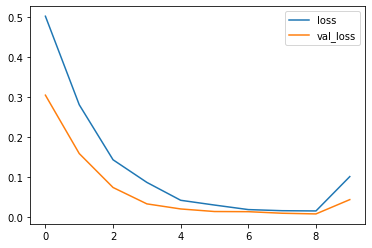

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [ ]:
input_text = vectorizer('ههههههههههه')

In [ ]:
res = model.predict(np.array([input_text]))

1/1 [==============================] - 1s 923ms/step


In [ ]:
(res > 0.5).astype(int)

array([[0]])

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 202ms/step


array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [ ]:
batch_y

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

# 4. Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 203ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9888476133346558, Recall:0.9399293065071106, Accuracy:0.30000001192092896


# 5. Test and Gradio

In [ ]:
pip install gradio jinja2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf


In [ ]:
import gradio as gr

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('hey i freaken hate you!')

In [ ]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 824ms/step


In [ ]:
res

array([[0.00768746]], dtype=float32)

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

c:\Users\asus\anaconda3\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\asus\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\asus\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\asus\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://9f1b660e29e43e87.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x15318882ac0>,
 'http://127.0.0.1:7860/',
 'https://9f1b660e29e43e87.gradio.app')

Socket exception: An existing connection was forcibly closed by the remote host (10054)
